In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
#import data
file = "final database.csv"
data = pd.read_csv(file, low_memory=False, na_values=['n', 'n ', 'n-a','#',"n"])
data.dropna()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,0,0,72,0.0,0.0,global
17,USA,https://open.spotify.com/track/5xhJmd0I15jFcEd...,581.20,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,0,1,55,0.0,0.0,english speaking and nordic
18,UK,https://open.spotify.com/track/5xhJmd0I15jFcEd...,120.80,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,1,0,109,0.0,0.0,english speaking and nordic
19,Austria,https://open.spotify.com/track/5xhJmd0I15jFcEd...,404.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,0,0,62,0.0,0.0,english speaking and nordic
20,Australia,https://open.spotify.com/track/5xhJmd0I15jFcEd...,29.60,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,...,0,0,0,0,0,0,172,0.0,0.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170516,Taiwan,https://open.spotify.com/track/24XcdlmaW0EizWV...,102.00,thank you,Meghan Trainor - R. City,album,dance pop,9679028.0,False,Thank You (Deluxe),...,0,0,1,0,0,0,81,0.0,0.0,english speaking and nordic
170564,Taiwan,https://open.spotify.com/track/71KAUt91MxXAHR0...,631.60,somebody,Patrick Brasca,single,chinese r&b,2847.0,False,Somebody,...,0,0,1,0,0,0,78,0.0,0.0,english speaking and nordic
170577,Taiwan,https://open.spotify.com/track/5noC8HGZaLiXNdv...,1281.60,moonlight,Will Pan - Tia Ray,album,mandopop,143655.0,False,節奏先生,...,0,0,1,0,0,0,126,0.0,0.0,english speaking and nordic
170603,Taiwan,https://open.spotify.com/track/100eDEmpWV5YGVC...,6.40,audio,Sia - Diplo - Labrinth - LSD,album,australian dance,17732676.0,False,"LABRINTH, SIA & DIPLO PRESENT... LSD",...,0,0,1,0,0,0,193,0.0,0.0,english speaking and nordic


In [3]:
# Limit Dataset
data_limited = data[["Country",
                     "Uri",
                     "Popularity",
                     "Title",
                     "Artist",
                     "Album/Single", 
                     "Genre", 
                     "Artist_followers", 
                     "Explicit",
                     "Album",
                     "Release_date",
                     "Track_number",
                     "Tracks_in_album", 
                     "danceability", 
                     "energy", 
                     "key",
                     "loudness",
                     "mode",
                     "speechiness", 
                     "acoustics", 
                     "instrumentalness", 
                     "valence",
                     "tempo",
                     "duration_ms", 
                     "time_signature", 
                     "Genre_new", 
                     "Days_since_release", 
                     "Released_after_2017"]]

In [4]:
# Remove rows which have nan data present
data_limited.columns
for x in data_limited.columns:
    data_limited = data_limited[data_limited[x].notna()]

In [5]:
# Rounds tempo values to nearest whole number
data_limited["tempo"] = data_limited["tempo"].round()

# Removes any songs with a BPM of 0
data_limited = data_limited.loc[data_limited["tempo"] != 0]

total_songs = data_limited["tempo"].value_counts().sum()
print(f"The total number of songs, excluding songs with 0 BPM, is {total_songs}")

The total number of songs, excluding songs with 0 BPM, is 163527


In [6]:
# Calculate and print the mode / median / mean of tempos in the Dataset

mean = data_limited["tempo"].mean()
median = data_limited["tempo"].median()

print(f"The mean tempo (BPM) is {mean.round(2)}.")
print(f"The median tempo (BPM) is {median.round(2)}.")
stats.mode(data_limited["tempo"])

The mean tempo (BPM) is 121.06.
The median tempo (BPM) is 120.0.


ModeResult(mode=array([100.]), count=array([5816]))

In [7]:
# Creates a Dataframe which list the # of songs per BPM, from most to least popular. 
bpm_df = pd.DataFrame({"tempo": data_limited["tempo"].value_counts().index,
                "Songs" : data_limited["tempo"].value_counts().values
    
})
bpm_df

,tempo,Songs
0,100.0,5816
1,120.0,5520
2,140.0,4934
3,130.0,4340
4,105.0,3649
...,...,...
169,34.0,1
170,217.0,1
171,230.0,1
172,36.0,1


In [8]:
# User Input
top_x_songs = 10

# Define Variables
total_songs = bpm_df["Songs"].sum()
song_count = 0

# Determines what % of songs is included  in the top X most popular BPMs. 
for index, row in bpm_df[:top_x_songs].iterrows():
    song_count += row["Songs"]
percent_songs = song_count/total_songs
print(f"The top {top_x_songs} most popular BPMs represent {(percent_songs * 100).round(2)}% of all songs in the dataset.")

The top 10 most popular BPMs represent 24.56% of all songs in the dataset.


In [9]:
# Define Variables
total_songs = bpm_df["Songs"].sum()
song_count = 0
half_df_length = int(len(bpm_df)/2)

# Determines what % of songs is included  in the bottom half of BPMs. 
for index, row in bpm_df[half_df_length:].iterrows():
    song_count += row["Songs"]
percent_songs = song_count/total_songs
print(f"The bottom half of BPMs represent {(percent_songs * 100).round(2)}% of all songs in the dataset.")

The bottom half of BPMs represent 7.95% of all songs in the dataset.


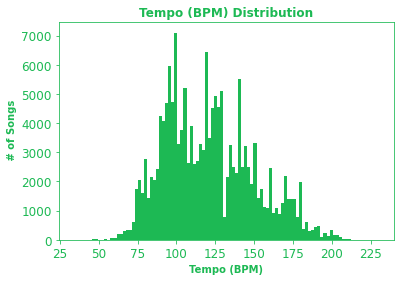

In [11]:
plt.hist(data_limited["tempo"], bins=100, color="#1db954")
plt.title('Tempo (BPM) Distribution', weight='bold', color="#1db954")
plt.xlabel('Tempo (BPM)', weight='bold', color="#1db954")
plt.ylabel(" # of Songs", weight='bold', color="#1db954")
plt.rc('axes',edgecolor="#1db954")
plt.tick_params(axis='x', colors="#1db954", labelsize=12)
plt.tick_params(axis='y', colors="#1db954", labelsize=12)
# plt.savefig('temp.png', transparent=True, dpi=500)

In [12]:
stats.normaltest(data_limited["tempo"])

NormaltestResult(statistic=6894.061306356079, pvalue=0.0)

In [13]:
# Creates a dataframe of BPM, # of songs, and their  average popularity. 
tempo_group_df = data_limited.groupby(["tempo"])["Popularity"].mean().round(2)
tempo_popularity_df = pd.merge(bpm_df, tempo_group_df, on="tempo")
tempo_popularity_df = tempo_popularity_df.rename(columns={"Popularity":"Average Popularity"})

# Add Median Popularity Column
tempo_group_df = data_limited.groupby(["tempo"])["Popularity"].median().round(2)
tempo_popularity_df = pd.merge(tempo_popularity_df, tempo_group_df, on="tempo")
tempo_popularity_df = tempo_popularity_df.rename(columns={"Popularity":"Median Popularity", "tempo":"BPM"})

In [14]:
tempo_popularity_df_Q50 = tempo_popularity_df.loc[tempo_popularity_df["Songs"] >= tempo_popularity_df["Songs"].quantile(.5)]
tempo_popularity_df_Q50.sort_values(by=["Songs"], ascending=False)

,BPM,Songs,Average Popularity,Median Popularity
0,100.0,5816,6751.36,803.47
1,120.0,5520,4517.67,491.90
2,140.0,4934,4414.47,494.05
3,130.0,4340,5024.29,499.65
4,105.0,3649,7048.95,917.95
...,...,...,...,...
82,131.0,767,3185.70,338.65
83,129.0,751,4252.42,363.55
84,139.0,743,2843.82,400.80
85,166.0,730,6509.68,576.80


In [15]:
stats.pearsonr(tempo_popularity_df_Q50["Songs"],tempo_popularity_df_Q50["Median Popularity"])

(0.2835554446801429, 0.00778078161411551)

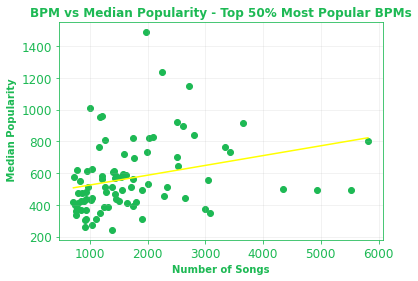

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(tempo_popularity_df_Q50["Songs"],tempo_popularity_df_Q50["Median Popularity"])
regress_value = slope * tempo_popularity_df_Q50["Songs"] + intercept

plt.scatter(tempo_popularity_df_Q50["Songs"],tempo_popularity_df_Q50["Median Popularity"], color="#1db954")
plt.title("BPM vs Median Popularity - Top 50% Most Popular BPMs", weight='bold', color="#1db954")
plt.xlabel('Number of Songs', weight='bold', color="#1db954")
plt.ylabel(" Median Popularity", weight='bold', color="#1db954")
plt.rc('axes',edgecolor="#1db954")
plt.tick_params(axis='x', colors="#1db954", labelsize=12)
plt.tick_params(axis='y', colors="#1db954", labelsize=12)
plt.grid(alpha=0.2)
plt.subplots_adjust(left=0.15)
plt.plot(tempo_popularity_df_Q50["Songs"],regress_value, "yellow" )
plt.savefig('temp3.png', transparent=True, dpi=500)